In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn 

# Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline

In [ ]:
%matplotlib inline

# Load datasets

In [41]:
fulfillment_data = pd.read_csv('datasets/fulfillment.csv')
inventory_data = pd.read_csv('datasets/inventory.csv')
orders_and_shipments_data = pd.read_csv('datasets/orders_and_shipments.csv')

fulfillment_df = pd.read_csv('datasets/fulfillment.csv')
inventory_df = pd.read_csv('datasets/inventory.csv')
orders_shipments_df = pd.read_csv('datasets/orders_and_shipments.csv')

# Join datasets based on common columns
merged_data = pd.merge(orders_and_shipments_data, fulfillment_data, on='Product Name', how='inner')
merged_data = pd.merge(merged_data, inventory_data, on='Product Name', how='inner')

merged_df = pd.merge(orders_shipments_df, fulfillment_df, on='Product Name')

# Explore the structure of each dataset

In [42]:
print("Fulfillment Data:")
print(fulfillment_data.info())
print("\nInventory Data:")
print(inventory_data.info())
print("\nOrders and Shipments Data:")
print(orders_and_shipments_data.info())

Fulfillment Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product Name                          118 non-null    object 
 1    Warehouse Order Fulfillment (days)   118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB
None

Inventory Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1    Year Month              4200 non-null   int64  
 2    Warehouse Inventory     4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB
None

Orders and Shipments Data:
<class 'p

# Basic statistical summary

In [43]:
print("\nFulfillment Data Summary:")
print(fulfillment_data.describe())
print("\nInventory Data Summary:")
print(inventory_data.describe())
print("\nOrders and Shipments Data Summary:")
print(orders_and_shipments_data.describe())


Fulfillment Data Summary:
        Warehouse Order Fulfillment (days) 
count                            118.000000
mean                               5.333898
std                                2.414282
min                                1.000000
25%                                3.300000
50%                                5.300000
75%                                6.975000
max                                9.900000

Inventory Data Summary:
         Year Month    Warehouse Inventory   Inventory Cost Per Unit
count    4200.000000            4200.000000              4200.000000
mean   201607.705714              16.908095                 1.236450
std        81.411495              71.121721                 0.652183
min    201501.000000               0.000000                 0.102360
25%    201510.000000               0.000000                 0.672187
50%    201607.000000               0.000000                 1.262455
75%    201704.000000               4.000000                 1.800760


# What are the top-selling products in terms of gross sales?

In [48]:
top_selling_products = orders_shipments_df.groupby('Product Name')[' Gross Sales '].sum().nlargest(10)
print("Top-selling products:")
print(top_selling_products)

Top-selling products:
Product Name
Field & Stream Sportsman 16 Gun Fire Safe        1151200
Perfect Fitness Perfect Rip Deck                  777120
Diamondback Women's Serene Classic Comfort Bi     728100
Nike Men's Free 5.0+ Running Shoe                 645500
Nike Men's Dri-FIT Victory Golf Polo              544300
Pelican Sunstream 100 Kayak                       536200
O'Brien Men's Neoprene Life Vest                  508200
Nike Men's CJ Elite 2 TD Football Cleat           501150
Under Armour Girls' Toddler Spine Surge Runni     227560
Web Camera                                         86332
Name:  Gross Sales , dtype: int64


# Can you provide a breakdown of gross sales by product department?

In [51]:
gross_sales_by_department = orders_shipments_df.groupby('Product Department')[' Gross Sales '].sum()
print("\nGross sales breakdown by product department:")
print(gross_sales_by_department)


Gross sales breakdown by product department:
Product Department
Apparel              1341243
Book Shop               1736
Discs Shop             26955
Fan Shop             2934670
Fitness                59268
Footwear              697686
Golf                  805305
Health and Beauty       8497
Outdoors              200834
Pet Shop                6300
Technology             98982
Name:  Gross Sales , dtype: int64


# How does the order fulfillment time vary across different warehouses?

In [61]:
fulfillment_time_by_warehouse = merged_df.groupby('Warehouse Country')[' Warehouse Order Fulfillment (days) '].mean()
print("\nAverage order fulfillment time by warehouse:")
print(fulfillment_time_by_warehouse)


Average order fulfillment time by warehouse:
Warehouse Country
Puerto Rico    6.245932
USA            6.258930
Name:  Warehouse Order Fulfillment (days) , dtype: float64


# Plotting the average order fulfillment time by warehouse

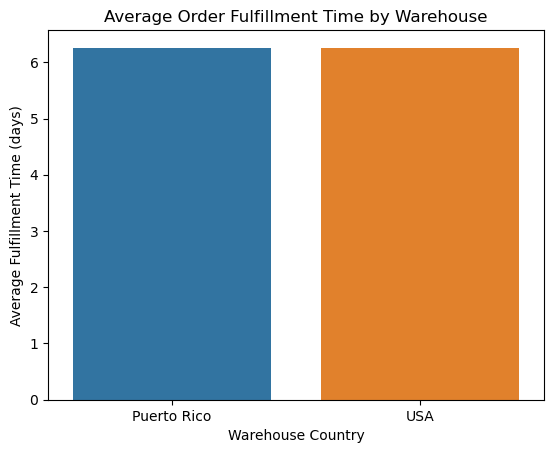

In [62]:
sns.barplot(x=fulfillment_time_by_warehouse.index, y=fulfillment_time_by_warehouse.values)
plt.title('Average Order Fulfillment Time by Warehouse')
plt.xlabel('Warehouse Country')
plt.ylabel('Average Fulfillment Time (days)')
plt.show()

# What is the average discount percentage for orders in each product category?

In [65]:
# Convert 'Discount %' column to numeric
orders_shipments_df[' Discount % '] = pd.to_numeric(orders_shipments_df[' Discount % '], errors='coerce')

avg_discount_by_category = orders_shipments_df.groupby('Product Category')[' Discount % '].mean()
print("\nAverage discount percentage by product category:")
print(avg_discount_by_category)


Average discount percentage by product category:
Product Category
Accessories             0.117902
As Seen on  TV!         0.118182
Baby                    0.106000
Baseball & Softball     0.115182
Basketball              0.118571
Books                   0.101538
Boxing & MMA            0.115278
CDs                     0.105500
Cameras                 0.107253
Camping & Hiking        0.106902
Cardio Equipment        0.106863
Children's Clothing     0.114444
Cleats                  0.107365
Consumer Electronics    0.108696
Crafts                  0.111111
DVDs                    0.109820
Electronics             0.105923
Fishing                 0.109693
Fitness Accessories     0.111400
Garden                  0.105873
Girls' Apparel          0.104158
Golf Apparel            0.097778
Golf Bags & Carts       0.093333
Golf Balls              0.113099
Golf Gloves             0.108503
Golf Shoes              0.111609
Health and Beauty       0.111429
Hockey                  0.110854
Hunting &

# Plotting the average discount percentage by product category

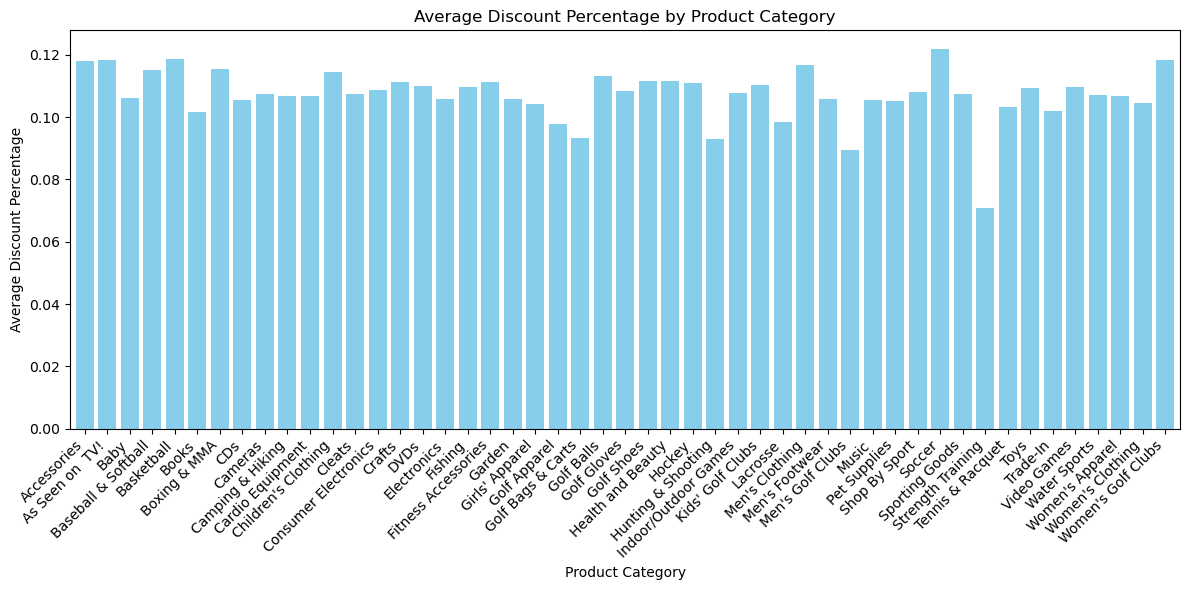

In [73]:
# Increase the figure size to make more room for x-axis labels
plt.figure(figsize=(12, 6))

avg_discount_by_category.plot(kind='bar', color='skyblue', width=0.8)

plt.title('Average Discount Percentage by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Which warehouse has the highest and lowest inventory levels?

In [68]:
highest_inventory_warehouse = inventory_df.loc[inventory_df[' Warehouse Inventory '].idxmax()]['Product Name']
lowest_inventory_warehouse = inventory_df.loc[inventory_df[' Warehouse Inventory '].idxmin()]['Product Name']
print(f"\nWarehouse with the highest inventory: {highest_inventory_warehouse}")
print(f"Warehouse with the lowest inventory: {lowest_inventory_warehouse}")


Warehouse with the highest inventory: Perfect Fitness Perfect Rip Deck
Warehouse with the lowest inventory: Perfect Fitness Perfect Rip Deck


# What is the average profit margin for each product category?

In [70]:
avg_profit_margin_by_category = orders_shipments_df.groupby('Product Category')[' Profit '].mean()
print("\nAverage profit margin by product category:")
print(avg_profit_margin_by_category)


Average profit margin by product category:
Product Category
Accessories              56.633229
As Seen on  TV!         135.000000
Baby                     28.000000
Baseball & Softball     102.741071
Basketball              132.000000
Books                    15.000000
Boxing & MMA            129.565789
CDs                       6.000000
Cameras                 219.000000
Camping & Hiking        150.000000
Cardio Equipment        239.447489
Children's Clothing     169.000000
Cleats                  146.984644
Consumer Electronics    123.000000
Crafts                  231.000000
DVDs                     79.000000
Electronics              84.267308
Fishing                 200.000000
Fitness Accessories      66.000000
Garden                  258.000000
Girls' Apparel           88.560000
Golf Apparel             47.275862
Golf Bags & Carts        82.000000
Golf Balls               40.208889
Golf Gloves              70.765363
Golf Shoes              126.354839
Health and Beauty       136.0

# Plotting the average profit margin by product category

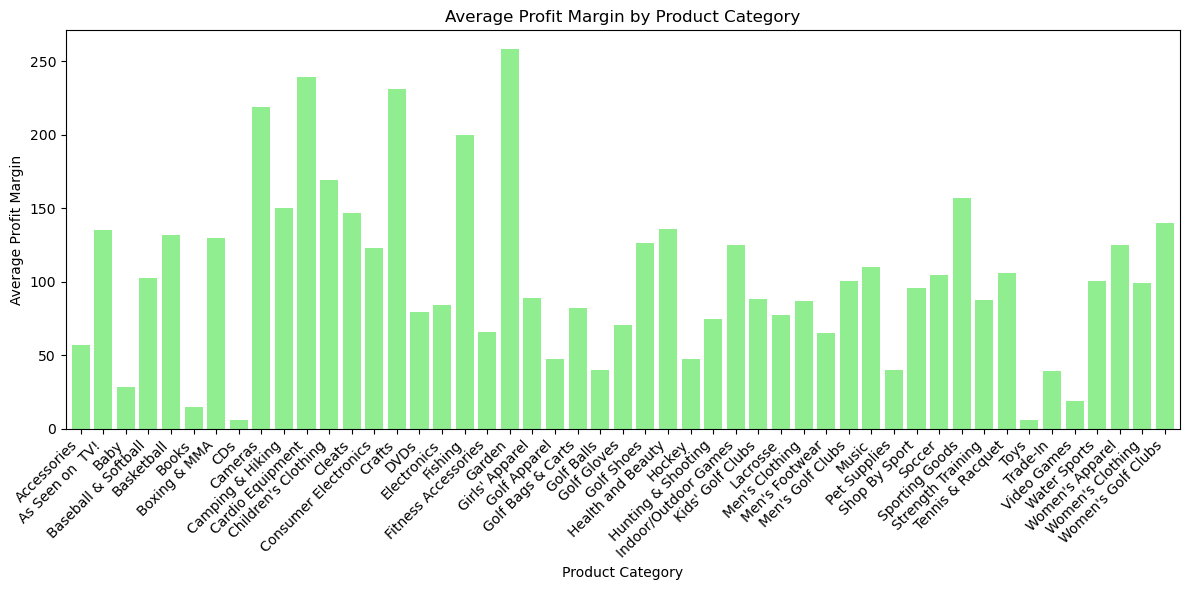

In [74]:
# Increase the figure size to make more room for x-axis labels
plt.figure(figsize=(12, 6))

avg_profit_margin_by_category.plot(kind='bar', color='lightgreen', width=0.8)

plt.title('Average Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Can you identify any seasonal trends in order quantities or gross sales?

In [78]:
seasonal_trends = orders_shipments_df.groupby([' Order Year ', ' Order Month '])[['Order Quantity', ' Gross Sales ']].mean()
print("\nSeasonal Trends in Order Quantities and Gross Sales:")
print(seasonal_trends)


Seasonal Trends in Order Quantities and Gross Sales:
                            Order Quantity   Gross Sales 
 Order Year   Order Month                                
2015         1                    2.284114     198.362525
             2                    2.230058     205.589595
             3                    2.310011     194.173305
             4                    2.244161     197.194268
             5                    2.156863     196.757353
             6                    2.177956     200.629162
             7                    2.248581     195.373439
             8                    2.092255     201.534169
             9                    2.147406     197.698113
             10                   2.153499     204.518059
             11                   2.304450     198.033958
             12                   2.115075     197.310702
2016         1                    2.125257     198.998973
             2                    2.259756     199.384146
             3    

# Plot Seasonal Trends in Order Quantities and Gross Sales

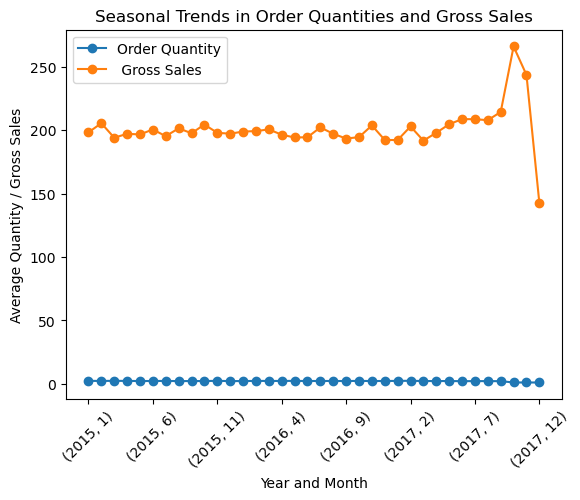

In [117]:
seasonal_trends.plot(kind='line', marker='o')
plt.title('Seasonal Trends in Order Quantities and Gross Sales')
plt.xlabel('Year and Month')
plt.ylabel('Average Quantity / Gross Sales')
plt.xticks(rotation=45) 
plt.show()

# What is the average shipment duration for each shipment mode?

In [81]:
avg_shipment_duration_by_mode = orders_shipments_df.groupby('Shipment Mode')[' Shipment Days - Scheduled '].mean()
print("\nAverage Shipment Duration by Shipment Mode:")
print(avg_shipment_duration_by_mode)


Average Shipment Duration by Shipment Mode:
Shipment Mode
First Class       1.0
Same Day          3.0
Second Class      2.0
Standard Class    4.0
Name:  Shipment Days - Scheduled , dtype: float64


# Plot Average Shipment Duration by Shipment Mode

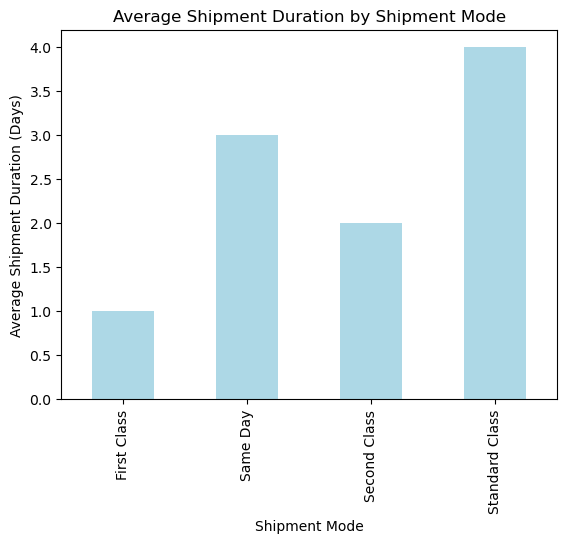

In [82]:
avg_shipment_duration_by_mode.plot(kind='bar', color='lightblue')
plt.title('Average Shipment Duration by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Average Shipment Duration (Days)')
plt.show()

# Are there any products with consistently high or low discount percentages?

In [83]:
discount_percentages = orders_shipments_df.groupby('Product Name')[' Discount % '].mean()
high_discount_products = discount_percentages[discount_percentages > 0.2].index
low_discount_products = discount_percentages[discount_percentages < 0.05].index
print("\nProducts with Consistently High Discount Percentages:")
print(high_discount_products)
print("\nProducts with Consistently Low Discount Percentages:")
print(low_discount_products)


Products with Consistently High Discount Percentages:
Index(['Garmin Approach S4 Golf GPS Watch'], dtype='object', name='Product Name')

Products with Consistently Low Discount Percentages:
Index(['GoPro HERO3+ Black Edition Camera'], dtype='object', name='Product Name')


# What are the most and least profitable product categories?

In [91]:
profitable_categories = avg_profit_margin_by_category.idxmax(), avg_profit_margin_by_category.idxmin()
print("\nMost Profitable Product Category:", profitable_categories[0])
print("Least Profitable Product Category:", profitable_categories[1])


Most Profitable Product Category: Garden
Least Profitable Product Category: CDs


# Can you provide a geographical breakdown of customer markets and their corresponding gross sales?

In [93]:
geographical_breakdown = orders_shipments_df.groupby(['Customer Market', 'Customer Region', 'Customer Country'])[' Gross Sales '].sum()
print("\nGeographical Breakdown of Customer Markets and Gross Sales:")
print(geographical_breakdown)


Geographical Breakdown of Customer Markets and Gross Sales:
Customer Market  Customer Region  Customer Country            
Africa           Central Africa   Angola                            8671
                                  Cameroon                         10820
                                  Democratic Republic of Congo     27856
                                  Gabon                             4275
                                  Republic of Congo                 1645
                                                                   ...  
Pacific Asia     West Asia        Saudi Arabia                     35701
                                  Syria                             3770
                                  Turkey                          114352
                                  UAE                               2216
                                  Yemen                             2650
Name:  Gross Sales , Length: 142, dtype: int64


# What is the overall trend in gross sales over the years?

In [98]:
overall_gross_sales_trend = orders_shipments_df.groupby(' Order Year ')[' Gross Sales '].sum()
print("\nOverall Trend in Gross Sales Over the Years:")
print(overall_gross_sales_trend)


Overall Trend in Gross Sales Over the Years:
 Order Year 
2015    2112579
2016    2213350
2017    1855547
Name:  Gross Sales , dtype: int64


# Are there any products that have experienced a significant increase or decrease in sales over time?

In [115]:
product_sales_over_time = orders_shipments_df.groupby(['Product Name', ' Order Year '])['Order Quantity'].sum().unstack()
product_sales_change = (product_sales_over_time.iloc[:, -1] - product_sales_over_time.iloc[:, 0]) / product_sales_over_time.iloc[:, 0]
significant_sales_change = product_sales_change[product_sales_change.abs() > 0.5].index
print("\nProducts with Significant Increase or Decrease in Sales Over Time:")
print(significant_sales_change)


Products with Significant Increase or Decrease in Sales Over Time:
Index(['Baby sweater', 'Bag Boy Beverage Holder', 'Bag Boy M330 Push Cart',
       'Bridgestone e6 Straight Distance NFL Carolina',
       'Bridgestone e6 Straight Distance NFL San Dieg',
       'Bridgestone e6 Straight Distance NFL Tennesse', 'CDs of rock',
       'Cleveland Golf Women's 588 RTX CB Satin Chrom',
       'Clicgear 8.0 Shoe Brush', 'DVDs', 'ENO Atlas Hammock Straps',
       'Elevation Training Mask 2.0', 'Fighting video games',
       'Glove It Imperial Golf Towel', 'Glove It Urban Brick Golf Towel',
       'Glove It Women's Imperial Golf Glove',
       'Glove It Women's Mod Oval 3-Zip Carry All Gol',
       'Hirzl Men's Hybrid Golf Glove', 'Hirzl Women's Hybrid Golf Glove',
       'Hirzl Women's Soffft Flex Golf Glove',
       'Industrial consumer electronics', 'LIJA Women's Argyle Golf Polo',
       'LIJA Women's Button Golf Dress',
       'LIJA Women's Eyelet Sleeveless Golf Polo', 'Lawn mower',
     

# What is the average order quantity for different product categories?

In [107]:
avg_order_quantity_by_category = orders_shipments_df.groupby('Product Category')['Order Quantity'].mean()
print("\nAverage Order Quantity for Different Product Categories:")
print(avg_order_quantity_by_category)


Average Order Quantity for Different Product Categories:
Product Category
Accessories             2.993730
As Seen on  TV!         2.727273
Baby                    1.000000
Baseball & Softball     2.705357
Basketball              1.000000
Books                   1.000000
Boxing & MMA            3.105263
CDs                     1.000000
Cameras                 1.000000
Camping & Hiking        1.000000
Cardio Equipment        3.020091
Children's Clothing     1.000000
Cleats                  3.014891
Consumer Electronics    1.000000
Crafts                  1.000000
DVDs                    1.000000
Electronics             2.921154
Fishing                 1.000000
Fitness Accessories     2.509434
Garden                  1.000000
Girls' Apparel          3.090000
Golf Apparel            2.637931
Golf Bags & Carts       1.000000
Golf Balls              2.977778
Golf Gloves             2.765363
Golf Shoes              2.838710
Health and Beauty       1.000000
Hockey                  2.775281
H

# What are the most common shipment modes used?

In [112]:
most_common_shipment_modes = orders_shipments_df['Shipment Mode'].value_counts().idxmax()
print("\nMost Common Shipment Modes:")
print(most_common_shipment_modes)


Most Common Shipment Modes:
Standard Class


# Plot Most Common Shipment Modes

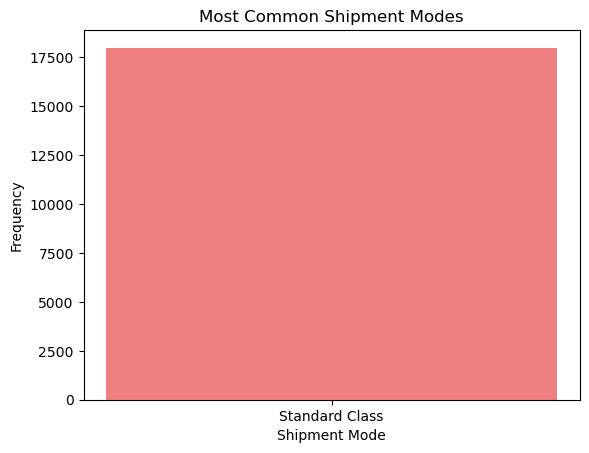

In [114]:
plt.bar(x=most_common_shipment_modes, height=orders_shipments_df['Shipment Mode'].value_counts()[most_common_shipment_modes], color='lightcoral')
plt.title('Most Common Shipment Modes')
plt.xlabel('Shipment Mode')
plt.ylabel('Frequency')
plt.show()